## Multithreading 
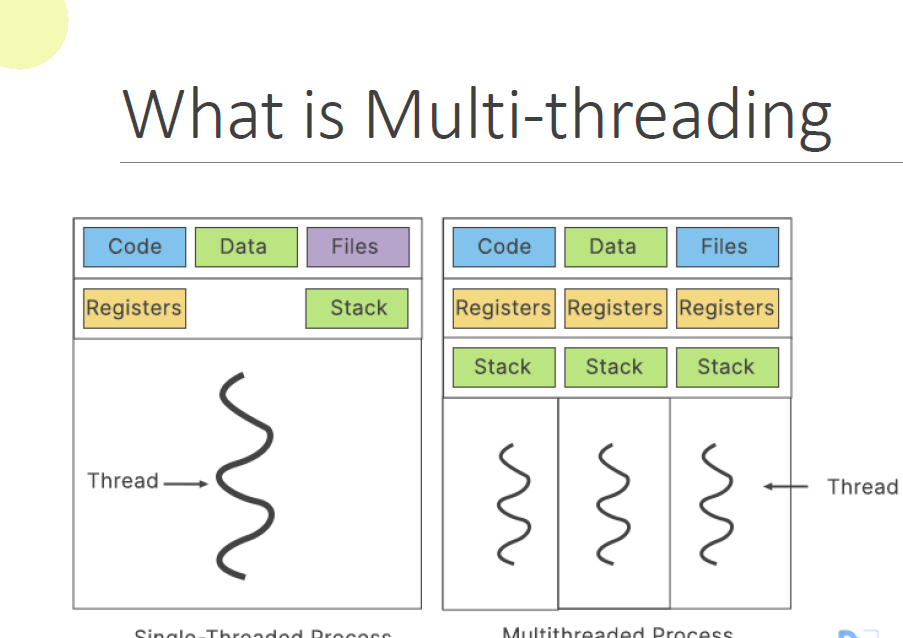

In [2]:
import time

In [3]:
def sq_data(num):
    """
    Takes the input as a number and retuns the square of number as output
    """
    # Introducing sleep of 3 seconds
    time.sleep(3)
    c = num**2
    print(f"Square of num {num} is {c}")
    return c

In [4]:
sq_data(35)

Square of num 35 is 1225


1225

In [5]:
def simple_interest(p,n,r):
    """
    Takes principal,number of years and rate of interest as inputs.
    Returns simple interest amount as output
    """
    time.sleep(5)
    si = (p*n*r)/100
    print(f"Simple interest is {si}")
    return si

In [6]:
simple_interest(45000,2,3.5)

Simple interest is 3150.0


3150.0

In [7]:
%%time
s1 = simple_interest(56000,3,3.9)
s1

Simple interest is 6552.0
CPU times: total: 0 ns
Wall time: 5 s


6552.0

In [8]:
%%time
from threading import Thread
th1 = Thread(target=sq_data,args=(125,))
th2 = Thread(target=simple_interest,args=(340000,6,12.5,))

th1.start()
th2.start()

th1.join()
th2.join()

Square of num 125 is 15625
Simple interest is 255000.0
CPU times: total: 62.5 ms
Wall time: 5.12 s


## Threads donot store the outputs.
### We will have to create functions with dictionary storage format and then use threads

In [9]:
def factorial(num):
    p =1
    for i in range(1,num+1):
        p=p*i
    return p

In [10]:
factorial(5)

120

In [11]:
def factorial2(num,results,key):
    time.sleep(3)
    p =1
    for i in range(1,num+1):
        p=p*i
    results[key] = p

In [13]:
fact_results = {}
factorial2(5,fact_results,5)

In [15]:
fact_results

{5: 120}

In [16]:
fact_results.get(5)

120

In [14]:
fact_results[5]

120

In [ ]:
# palindrome
st1 = 'madam'
st1[::-1]

'madam'

In [21]:
# not a palindrome
st2 = 'raman'
st2[::-1]

'namar'

In [22]:
def palindrome(string,results,key):
    time.sleep(4)
    if string == string[::-1]:
        results[key] = 'PALINDROME'
    else:
        results[key] = 'NOT A PALINDROME'

In [24]:
%%time
total_results = {}
th3 = Thread(target=factorial2,args=(10,total_results,"Factorail of 10 ",))
th4 = Thread(target=palindrome,args=("madam",total_results,"Palindrome for Madam text",))

th3.start()
th4.start()

th3.join()
th4.join()

# print the results
print("Factorial Output",total_results["Factorail of 10 "])
print("Palindrme output",total_results["Palindrome for Madam text"])

Factorial Output 3628800
Palindrme output PALINDROME
CPU times: total: 0 ns
Wall time: 4.16 s


In [25]:
total_results

{'Factorail of 10 ': 3628800, 'Palindrome for Madam text': 'PALINDROME'}

In [26]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
    ]

In [29]:
for i in urls:
    print(i.split('/')[-1])

train.csv
test.csv
data.csv


In [30]:
from urllib.request import urlretrieve

In [31]:
def download_datasets(url_link):
    # Extract the filename from url links provided
    file_name = url_link.split('/')[-1]

    # print the downlodaing status
    print(f"{file_name} is downloading")

    # retrieve contents from the provided url
    urlretrieve(url_link,filename=file_name)

    # print the downloading status
    print(f"{file_name} is downloaded")

In [32]:
for url in urls:
    download_datasets(url)

train.csv is downloading
train.csv is downloaded
test.csv is downloading
test.csv is downloaded
data.csv is downloading
data.csv is downloaded


In [33]:
%%time
threads_data = []
for url in urls:
    thread = Thread(target=download_datasets,args=(url,))
    thread.start()

    threads_data.append(thread)

for th in threads_data:
    th.join()


train.csv is downloading
test.csv is downloading
data.csv is downloading
test.csv is downloaded
train.csv is downloaded
data.csv is downloaded
CPU times: total: 750 ms
Wall time: 2.24 s
